In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
dados = pd.read_csv('C:/Users/dsadm/Desktop/IABD_B_FORMATIVA/dados_produtos.csv')

In [36]:
dados.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


Text(0.5, 0, 'product_name')

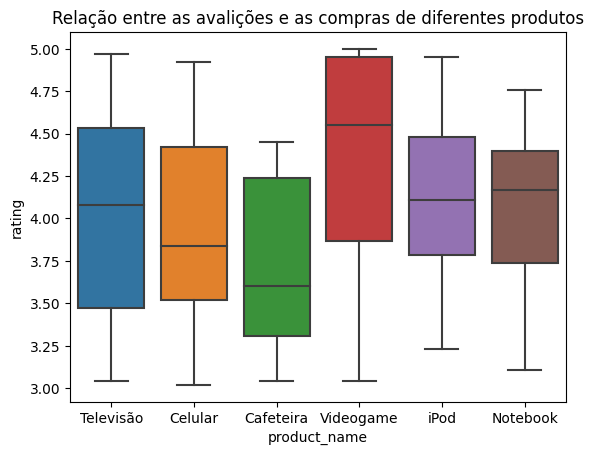

In [55]:
sns.boxplot(x=dados['product_name'], y = dados['rating'])
plt.title('Relação entre as avalições e as compras de diferentes produtos')
plt.ylabel('rating')
plt.xlabel('product_name')

In [56]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [57]:
dados.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [ ]:
dados['']

In [59]:
dados['rating'].isnull().sum()

0

In [63]:
dados['purchased'].isnull().sum()

0

In [71]:
# Separando as características e o rótulo
X = dados['rating']
y = dados['purchased']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)